In [ ]:
 !pip install mplfinance

In [ ]:
!pip install python-binance

In [ ]:
!pip install yfinance

# Prepare Data

In [ ]:
import pandas as pd
import mplfinance as mpf
from binance.client import Client
import yfinance as yf

In [ ]:
start = '2020-01-01'
end = '2021-01-01'

In [ ]:
data = yf.download("ETH-USD",period='1d',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353
...,...,...,...,...,...,...
2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,24222565862
2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,18710683199
2020-12-30,731.472839,754.303223,720.988892,751.618958,751.618958,17294574210


In [ ]:
from binance.client import Client
client = Client()

In [ ]:
data = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1DAY, start, end)

In [ ]:
data

In [ ]:
ETH = pd.DataFrame(data, columns =['otime','open','high','low','close','volume','ctime',
                                'quote_vol','no_trade','taker_base_vol','taker_quote_vol','ignore'])

In [ ]:
ETH

,otime,open,high,low,close,volume,ctime,quote_vol,no_trade,taker_base_vol,taker_quote_vol,ignore
0,1577836800000,129.16000000,133.05000000,128.68000000,130.77000000,144770.52197000,1577923199999,18952318.53206430,75888,71847.93883000,9407940.16106830,0
1,1577923200000,130.72000000,130.78000000,126.38000000,127.19000000,213757.05806000,1578009599999,27486853.39482150,96193,105830.56192000,13615064.56872850,0
2,1578009600000,127.19000000,135.14000000,125.88000000,134.35000000,413055.18895000,1578095999999,54139288.21657680,162310,227899.25531000,29863547.62120130,0
3,1578096000000,134.37000000,135.85000000,132.50000000,134.20000000,184276.17102000,1578182399999,24641135.56895300,95488,85809.67556000,11476955.59469460,0
4,1578182400000,134.20000000,138.19000000,134.19000000,135.37000000,254120.45343000,1578268799999,34593687.60327480,115106,126786.52057000,17260443.97042190,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1609113600000,685.10000000,748.09000000,681.04000000,730.41000000,1627154.39266000,1609199999999,1180438285.48840650,961277,832490.11082000,603982596.85125660,0
363,1609200000000,730.40000000,740.78000000,689.20000000,732.00000000,1106876.35855000,1609286399999,794643540.49012380,820504,543799.46855000,390697226.37305640,0
364,1609286400000,732.00000000,758.74000000,716.62000000,752.17000000,1008574.09906000,1609372799999,743546676.75446260,692405,514590.35901000,379464185.39099070,0
365,1609372800000,752.17000000,755.74000000,722.00000000,736.42000000,863375.57981000,1609459199999,638503822.39406460,623216,431442.91885000,319087759.04187390,0


In [ ]:
ETH = ETH[['otime','open','high','low','close','volume']]
ETH['otime'] = pd.to_datetime(ETH['otime'],unit= 'ms')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ETH

,otime,open,high,low,close,volume
0,2020-01-01,129.16000000,133.05000000,128.68000000,130.77000000,144770.52197000
1,2020-01-02,130.72000000,130.78000000,126.38000000,127.19000000,213757.05806000
2,2020-01-03,127.19000000,135.14000000,125.88000000,134.35000000,413055.18895000
3,2020-01-04,134.37000000,135.85000000,132.50000000,134.20000000,184276.17102000
4,2020-01-05,134.20000000,138.19000000,134.19000000,135.37000000,254120.45343000
...,...,...,...,...,...,...
362,2020-12-28,685.10000000,748.09000000,681.04000000,730.41000000,1627154.39266000
363,2020-12-29,730.40000000,740.78000000,689.20000000,732.00000000,1106876.35855000
364,2020-12-30,732.00000000,758.74000000,716.62000000,752.17000000,1008574.09906000
365,2020-12-31,752.17000000,755.74000000,722.00000000,736.42000000,863375.57981000


In [ ]:
ETH.set_index('otime')

,open,high,low,close,volume
otime,,,,,
2020-01-01,129.16000000,133.05000000,128.68000000,130.77000000,144770.52197000
2020-01-02,130.72000000,130.78000000,126.38000000,127.19000000,213757.05806000
2020-01-03,127.19000000,135.14000000,125.88000000,134.35000000,413055.18895000
2020-01-04,134.37000000,135.85000000,132.50000000,134.20000000,184276.17102000
2020-01-05,134.20000000,138.19000000,134.19000000,135.37000000,254120.45343000
...,...,...,...,...,...
2020-12-28,685.10000000,748.09000000,681.04000000,730.41000000,1627154.39266000
2020-12-29,730.40000000,740.78000000,689.20000000,732.00000000,1106876.35855000
2020-12-30,732.00000000,758.74000000,716.62000000,752.17000000,1008574.09906000


In [ ]:
ETH

,otime,open,high,low,close,volume
0,2020-01-01,129.16000000,133.05000000,128.68000000,130.77000000,144770.52197000
1,2020-01-02,130.72000000,130.78000000,126.38000000,127.19000000,213757.05806000
2,2020-01-03,127.19000000,135.14000000,125.88000000,134.35000000,413055.18895000
3,2020-01-04,134.37000000,135.85000000,132.50000000,134.20000000,184276.17102000
4,2020-01-05,134.20000000,138.19000000,134.19000000,135.37000000,254120.45343000
...,...,...,...,...,...,...
362,2020-12-28,685.10000000,748.09000000,681.04000000,730.41000000,1627154.39266000
363,2020-12-29,730.40000000,740.78000000,689.20000000,732.00000000,1106876.35855000
364,2020-12-30,732.00000000,758.74000000,716.62000000,752.17000000,1008574.09906000
365,2020-12-31,752.17000000,755.74000000,722.00000000,736.42000000,863375.57981000


In [ ]:
ETH = ETH.set_index('otime')

In [ ]:
ETH = ETH.astype(float)

In [ ]:
ETH

,open,high,low,close,volume
otime,,,,,
2020-01-01,129.16,133.05,128.68,130.77,1.447705e+05
2020-01-02,130.72,130.78,126.38,127.19,2.137571e+05
2020-01-03,127.19,135.14,125.88,134.35,4.130552e+05
2020-01-04,134.37,135.85,132.50,134.20,1.842762e+05
2020-01-05,134.20,138.19,134.19,135.37,2.541205e+05
...,...,...,...,...,...
2020-12-28,685.10,748.09,681.04,730.41,1.627154e+06
2020-12-29,730.40,740.78,689.20,732.00,1.106876e+06
2020-12-30,732.00,758.74,716.62,752.17,1.008574e+06


In [ ]:
ETH.loc['2020-01':'2020-03']

,open,high,low,close,volume
otime,,,,,
2020-01-01,129.16,133.05,128.68,130.77,144770.52197
2020-01-02,130.72,130.78,126.38,127.19,213757.05806
2020-01-03,127.19,135.14,125.88,134.35,413055.18895
2020-01-04,134.37,135.85,132.50,134.20,184276.17102
2020-01-05,134.20,138.19,134.19,135.37,254120.45343
...,...,...,...,...,...
2020-03-27,138.40,141.27,129.68,131.33,706948.54559
2020-03-28,131.33,132.97,124.88,130.98,896032.10594
2020-03-29,130.94,131.84,123.81,124.50,543997.00000


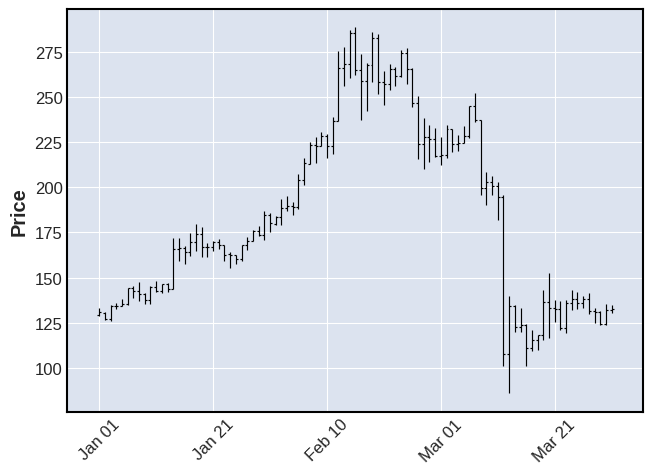

In [ ]:
mpf.plot(ETH.loc['2020-01':'2020-03'])

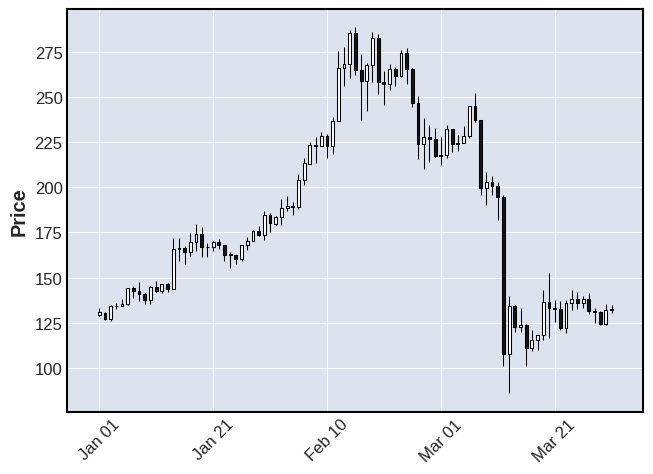

In [ ]:
mpf.plot(ETH[:'2020-03'], type='candle')

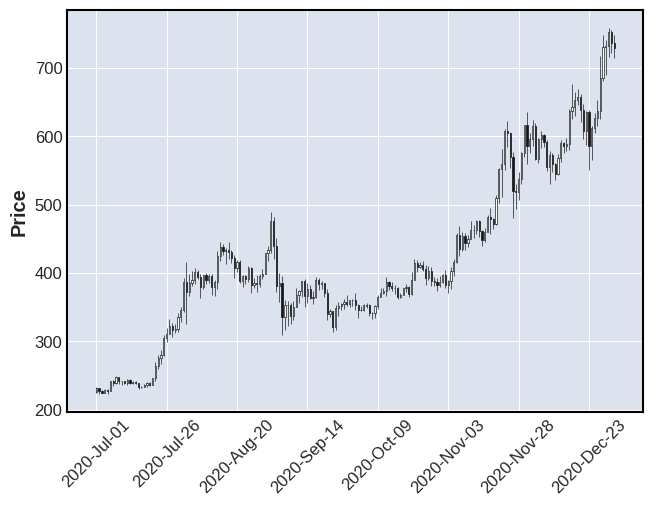

In [ ]:
mpf.plot(ETH['2020-07':], type='candle')

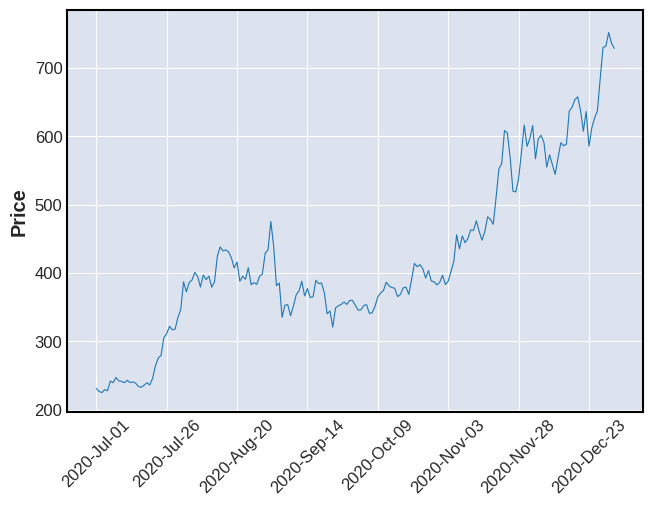

In [ ]:
mpf.plot(ETH['2020-07':], type='line')

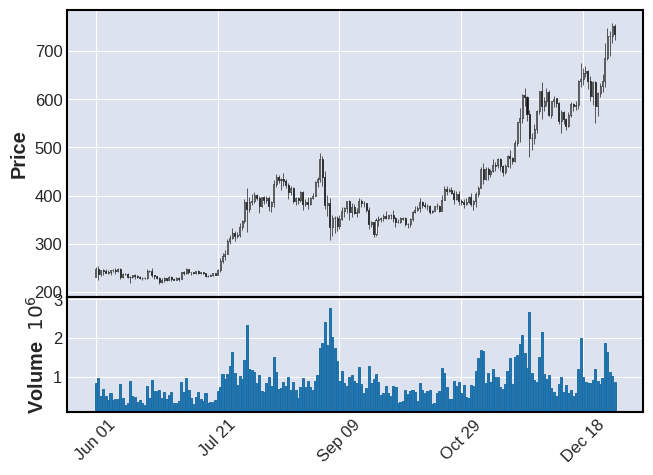

In [ ]:
mpf.plot(ETH['2020-06':'2020-12'], type='candle', volume=True)

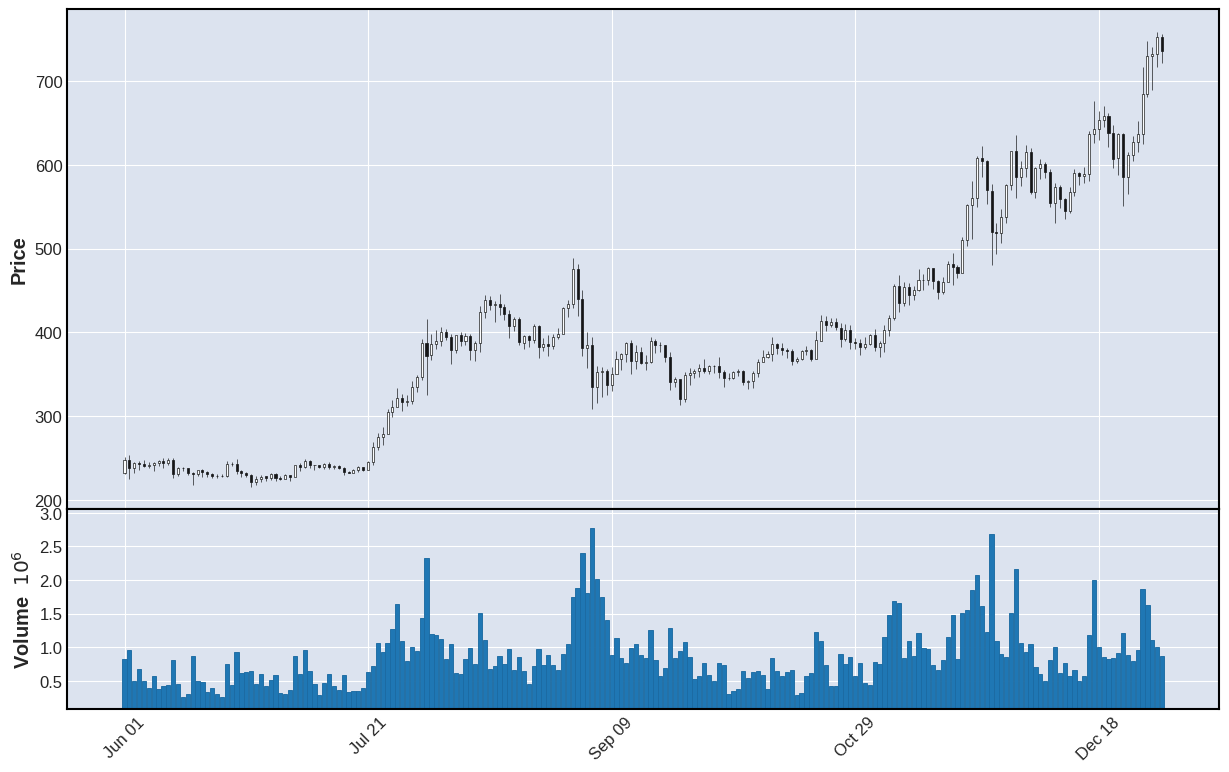

In [ ]:
mpf.plot(ETH['2020-06':'2020-12'], type='candle', volume=True,figsize=(16,10))

# ตกแต่ง

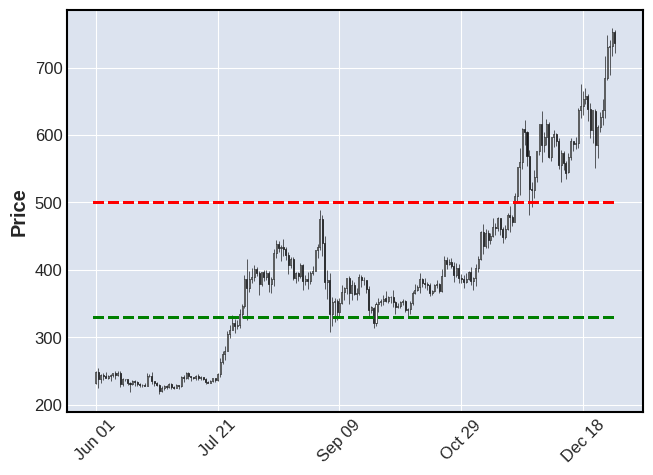

In [ ]:
mpf.plot(ETH['2020-06':'2020-12'], hlines=dict(hlines=[500,330], colors=['r','g'], linestyle='--'), type='candle')

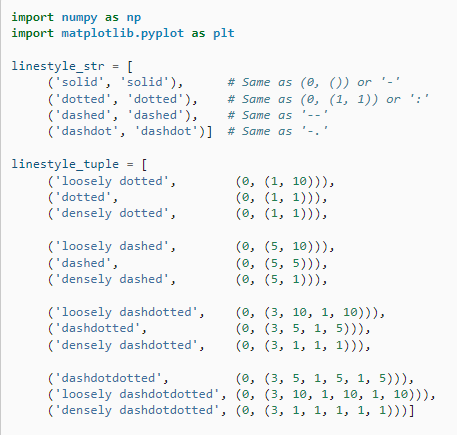

In [ ]:
mpf.plot(ETH['2020-06':'2020-12'], hlines=dict(hlines=[500, 300], colors=['r','g'], linestyle='-'), type='candle')

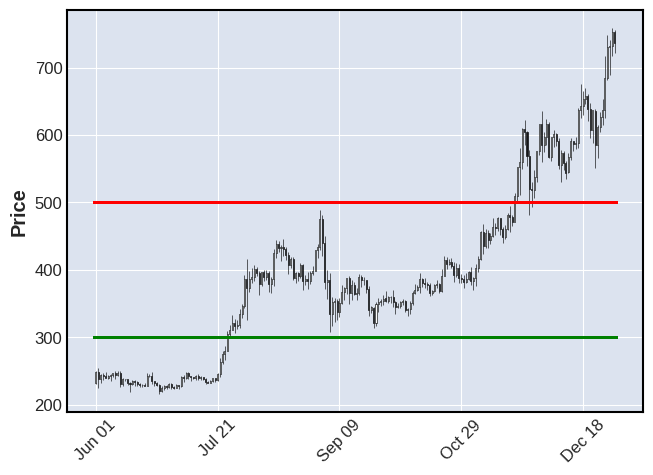

In [ ]:
mpf.plot(ETH['2020-06':'2020-12'], hlines=dict(hlines=[500, 300], colors=['r','g'], linestyle='solid'), type='candle')

### worth reading
### vline
### tline
https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb

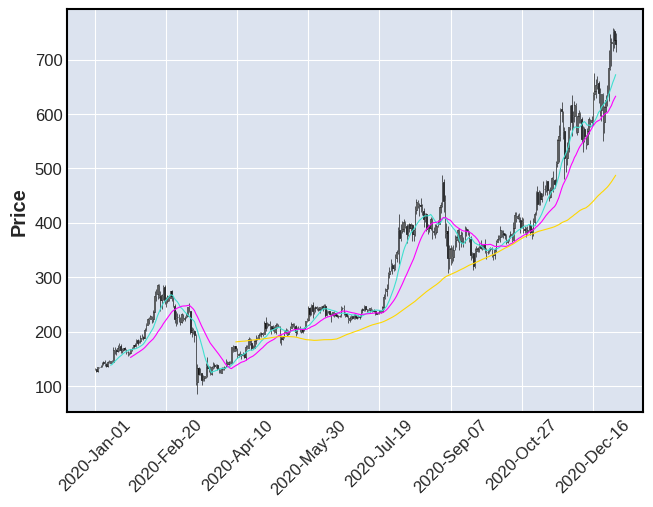

In [ ]:
mpf.plot(ETH, type='candle', mav=(12,26,100))

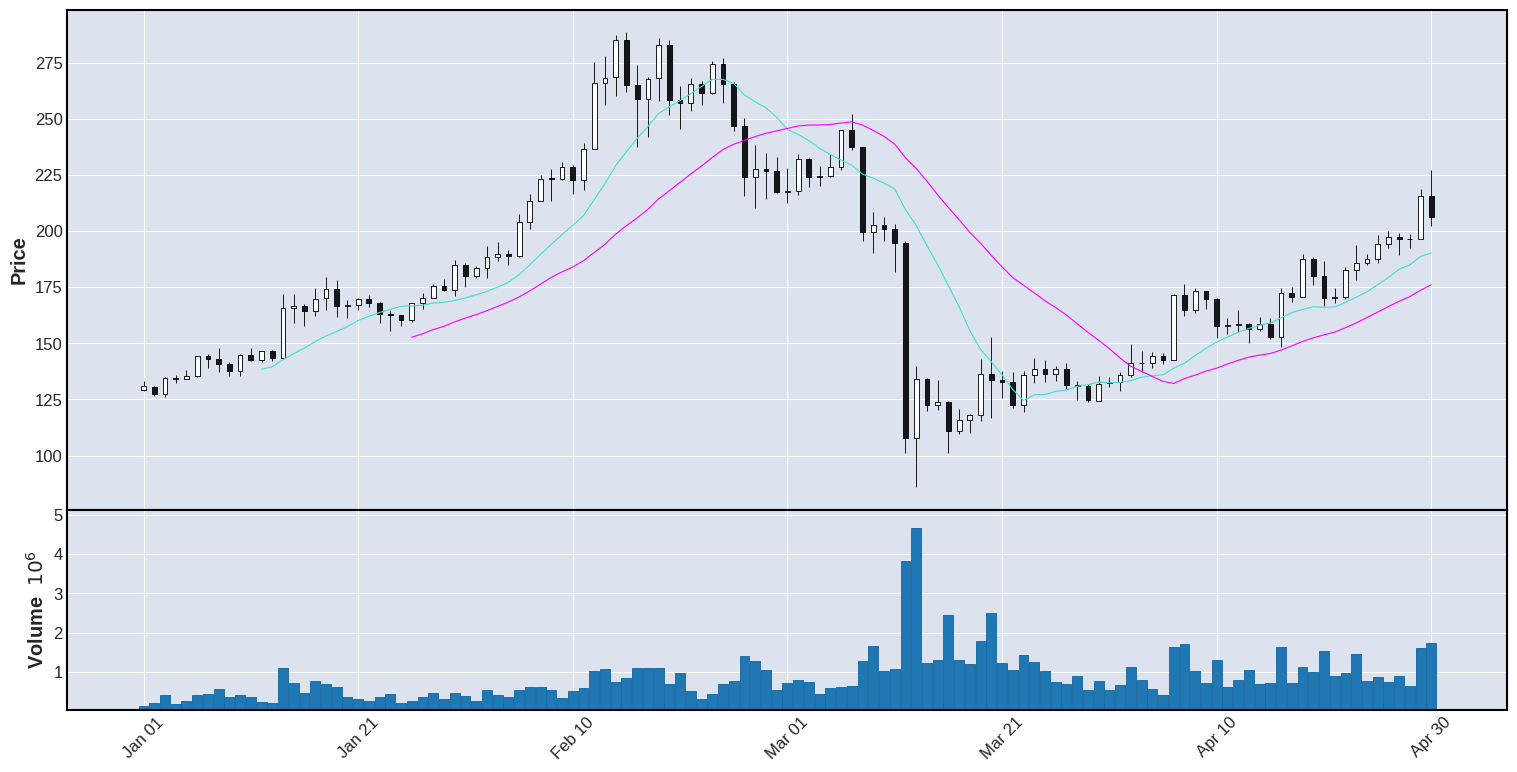

In [ ]:
mpf.plot(ETH[:'2020-4'], type='candle', volume=True, mav=(12,26),figsize=(20,10))

# ตกแต่งกันหน่อย !!
### tight_layout
### title


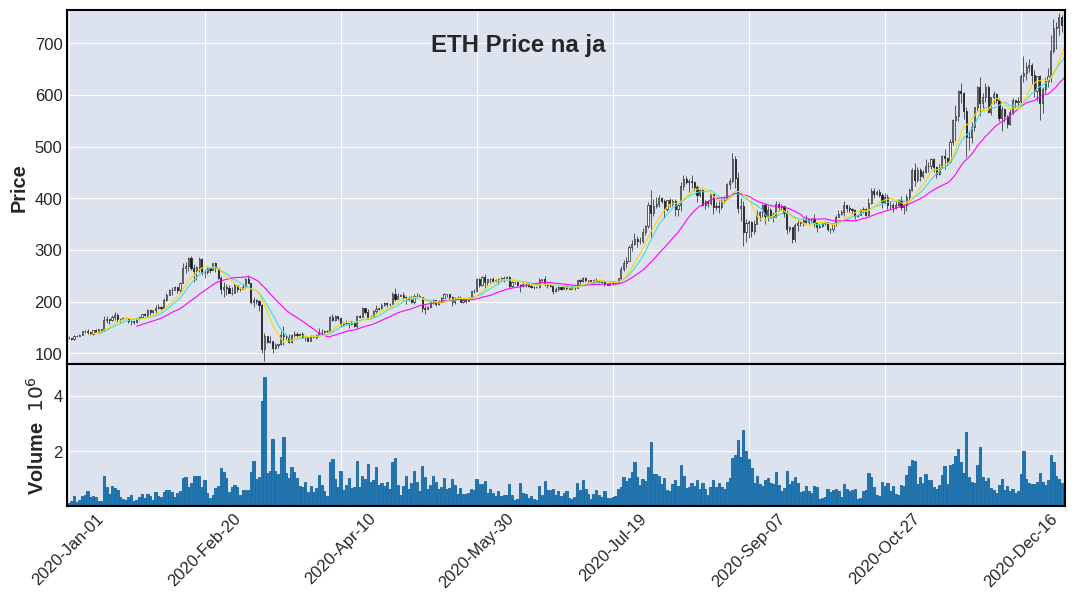

In [ ]:
mpf.plot(ETH, type='candle', volume=True, mav=(12,26,9), title='ETH Price na ja',tight_layout=True, figratio=(8, 4))

# make_addplot

In [ ]:
ret = ETH['close'].pct_change(2)

In [ ]:
ret

otime
2020-01-01         NaN
2020-01-02         NaN
2020-01-03    0.027376
2020-01-04    0.055114
2020-01-05    0.007592
                ...   
2020-12-28    0.145849
2020-12-29    0.068442
2020-12-30    0.029791
2020-12-31    0.006038
2021-01-01   -0.030924
Name: close, Length: 367, dtype: float64

In [ ]:
ETH.close

otime
2020-01-01    130.77
2020-01-02    127.19
2020-01-03    134.35
2020-01-04    134.20
2020-01-05    135.37
               ...  
2020-12-28    730.41
2020-12-29    732.00
2020-12-30    752.17
2020-12-31    736.42
2021-01-01    728.91
Name: close, Length: 367, dtype: float64

In [ ]:
134.35/130.77-1

0.027376309551120137

In [ ]:
ret_add = mpf.make_addplot(ret, color='yellow', ylabel='return')

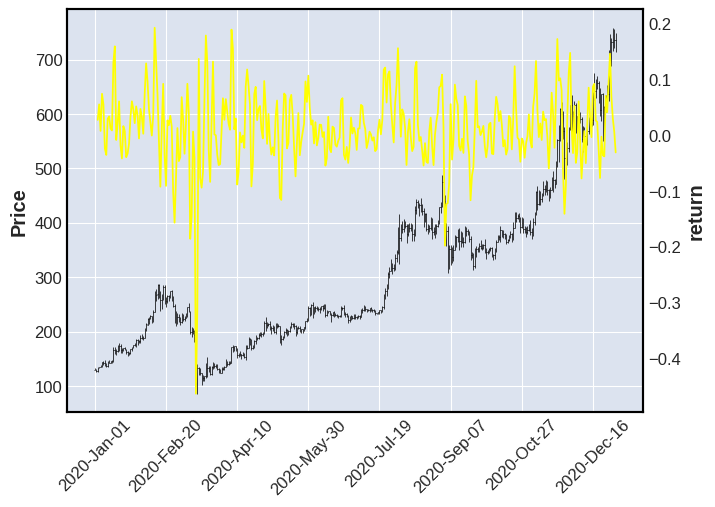

In [ ]:
mpf.plot(ETH, addplot=ret_add) 

In [ ]:
ret_add = mpf.make_addplot(ret, color='g', panel=1,  ylabel='return')

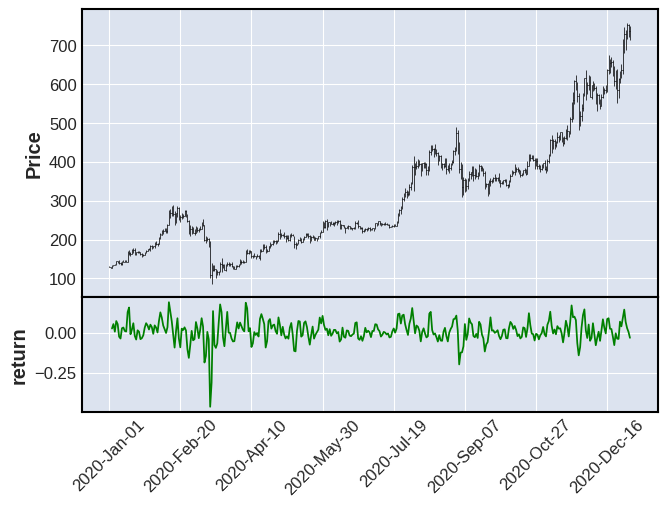

In [ ]:
mpf.plot(ETH, addplot=ret_add) 

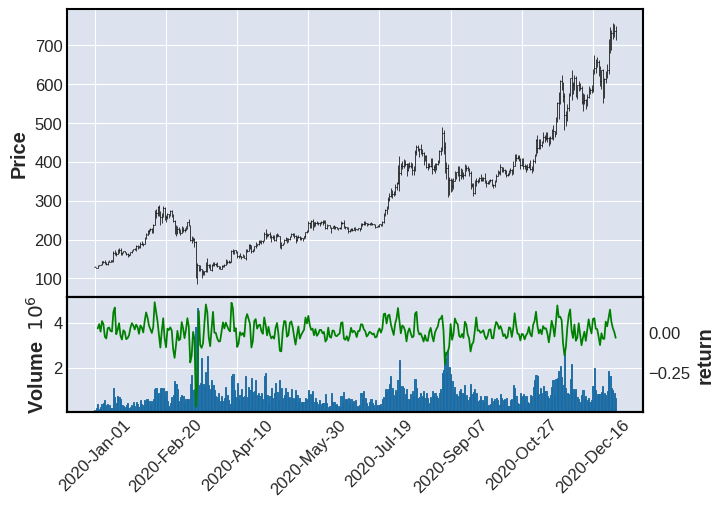

In [ ]:
mpf.plot(ETH, addplot=ret_add,volume=True) 

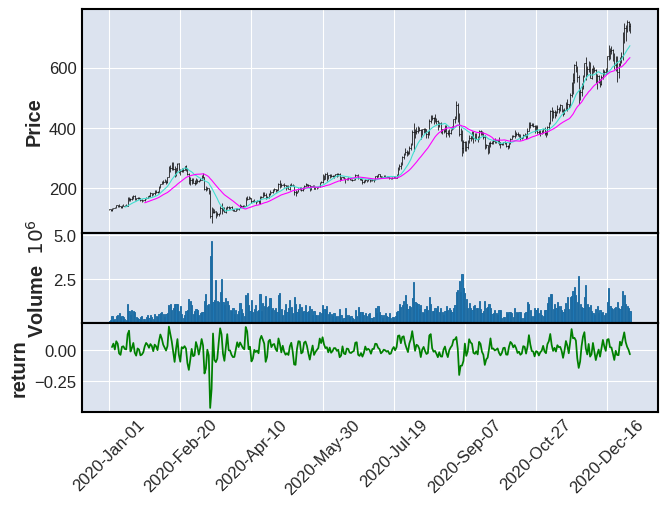

In [ ]:
ret_add = mpf.make_addplot(ret, color='green', panel=2,  ylabel='return')
mpf.plot(ETH, addplot=ret_add,volume=True,mav=(12,26)) 

In [ ]:
ETH.close

otime
2020-01-01    130.77
2020-01-02    127.19
2020-01-03    134.35
2020-01-04    134.20
2020-01-05    135.37
               ...  
2020-12-28    730.41
2020-12-29    732.00
2020-12-30    752.17
2020-12-31    736.42
2021-01-01    728.91
Name: close, Length: 367, dtype: float64

In [ ]:
ETH.close.rolling(5).mean()

otime
2020-01-01        NaN
2020-01-02        NaN
2020-01-03        NaN
2020-01-04        NaN
2020-01-05    132.376
               ...   
2020-12-28    658.418
2020-12-29    682.356
2020-12-30    707.426
2020-12-31    727.222
2021-01-01    735.982
Name: close, Length: 367, dtype: float64

In [ ]:
#Don't !!
ETH.close.ewm(3).mean()

otime
2020-01-01    130.770000
2020-01-02    128.724286
2020-01-03    131.157027
2020-01-04    132.269886
2020-01-05    133.286056
                 ...    
2020-12-28    661.704730
2020-12-29    679.278547
2020-12-30    697.501411
2020-12-31    707.231058
2021-01-01    712.650793
Name: close, Length: 367, dtype: float64

In [ ]:
ETH['EMA_5'] = ETH['close'].ewm(5,adjust=False,min_periods=5).mean()

In [ ]:
ema_plot = mpf.make_addplot(ETH['EMA_5'], ylabel='ema_5')

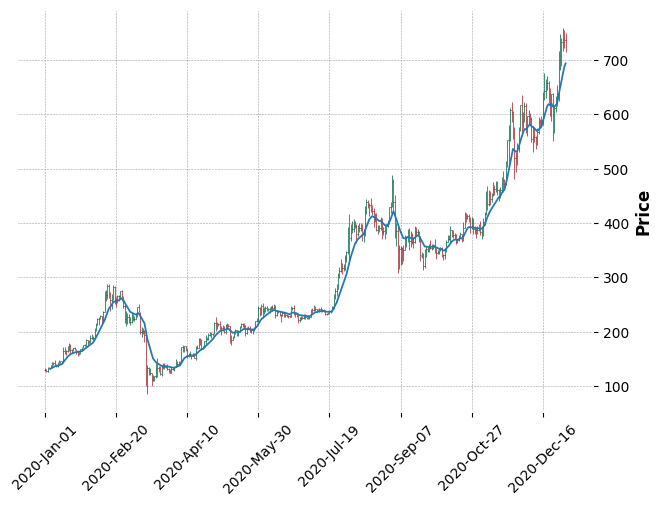

In [ ]:
mpf.plot(ETH,addplot=ema_plot,style='charles')

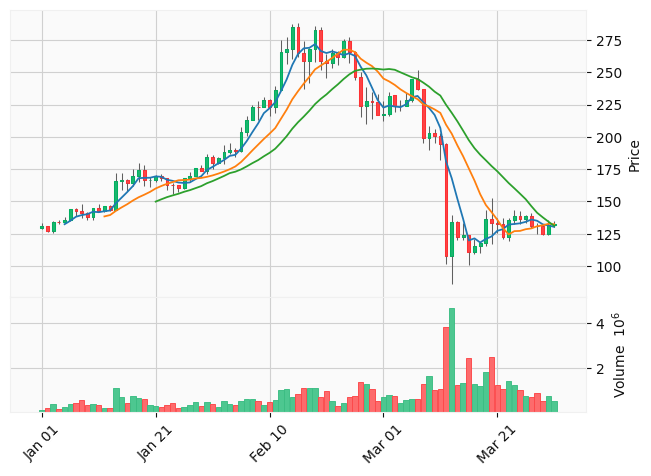

In [ ]:
mpf.plot(ETH[:'2020-03'],type='candle',style='yahoo',mav=(5,12,21),volume=True)